In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

In [2]:
df = pd.read_csv('wrangled_loans.csv')
df.head()

,Unnamed: 0,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_NAME,CURRENCY,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,COUNTRY_CODE,CONTINENT
0,0,Spanish,825.0,funded,Furniture Making,Manufacturing,Ecuador,USD,female,true,monthly,field_partner,EC,SA
1,1,English,525.0,funded,Poultry,Agriculture,Philippines,PHP,female,true,monthly,field_partner,PH,AS
2,2,Spanish,400.0,funded,Personal Housing Expenses,Housing,Peru,PEN,male,true,monthly,field_partner,PE,SA
3,3,English,225.0,funded,Farming,Agriculture,Philippines,PHP,female,true,monthly,field_partner,PH,AS
4,4,English,1575.0,funded,Grocery Store,Food,Tajikistan,TJS,female,true,monthly,field_partner,TJ,AS


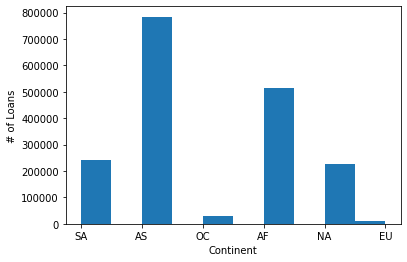

In [3]:
df.CONTINENT = df.CONTINENT.astype(str).replace('nan','NA')
df.CONTINENT = df.CONTINENT.astype(str).replace('None',None)
_ = plt.hist(df['CONTINENT'])
_ = plt.xlabel('Continent')
_ = plt.ylabel('# of Loans')

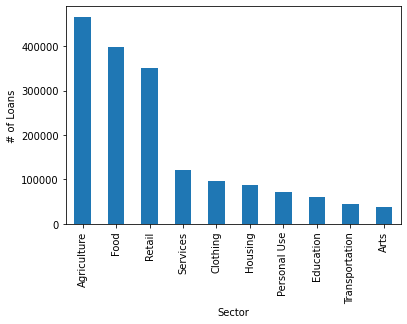

In [4]:
_ = pd.Series(df.SECTOR_NAME).value_counts()[:10].plot(kind="bar")
_ = plt.xlabel('Sector')
_ = plt.ylabel('# of Loans')

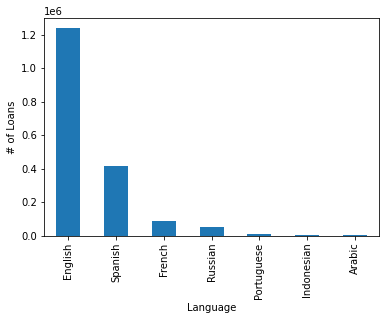

In [5]:
_ = pd.Series(df.ORIGINAL_LANGUAGE).value_counts()[:10].plot(kind="bar")
_ = plt.xlabel('Language')
_ = plt.ylabel('# of Loans')

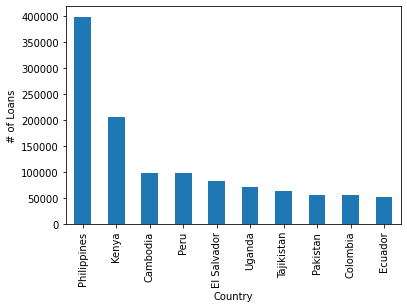

In [6]:
_ = pd.Series(df.COUNTRY_NAME).value_counts()[:10].plot(kind="bar")
_ = plt.xlabel('Country')
_ = plt.ylabel('# of Loans')

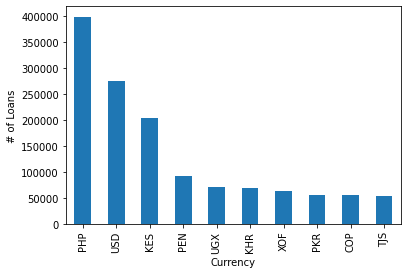

In [7]:
_ = pd.Series(df.CURRENCY).value_counts()[:10].plot(kind="bar")
_ = plt.xlabel('Currency')
_ = plt.ylabel('# of Loans')

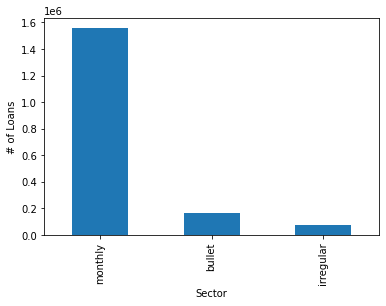

In [8]:
_ = pd.Series(df.REPAYMENT_INTERVAL).value_counts().plot(kind="bar")
_ = plt.xlabel('Sector')
_ = plt.ylabel('# of Loans')

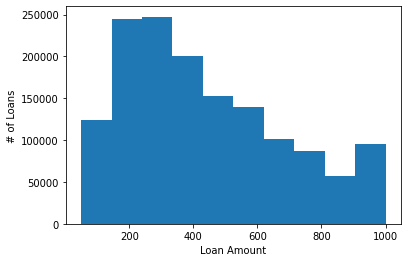

In [9]:
_ = plt.hist(df.LOAN_AMOUNT,range=[50, 1000],bins=10)
_ = plt.xlabel('Loan Amount')
_ = plt.ylabel('# of Loans')

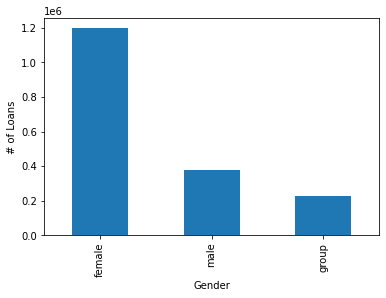

In [10]:
conditions = [
    (df['BORROWER_GENDERS'] == 'male'),
    (df['BORROWER_GENDERS'] == 'female')]
choices = ['male', 'female']
df['Gender'] = np.select(conditions, choices, default='group')
_ = pd.Series(df.Gender).value_counts().plot(kind="bar")
_ = plt.xlabel('Gender')
_ = plt.ylabel('# of Loans')

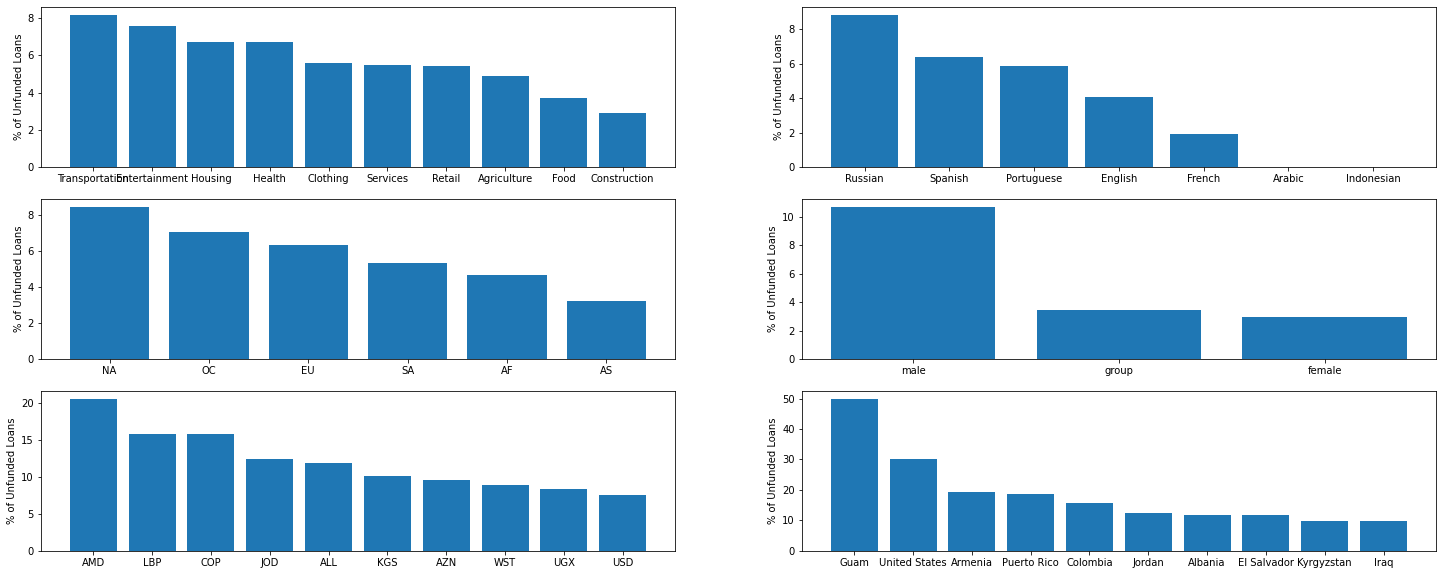

In [102]:
#Highest percentage of unfunded loans in each top feature category
categories = ['SECTOR_NAME','ORIGINAL_LANGUAGE','CONTINENT','Gender','CURRENCY','COUNTRY_NAME']
fig, axs = plt.subplots(3, 2,figsize=(25, 10))
for i, ax in enumerate(axs.flatten()):
    exp = df.groupby(categories[i])['STATUS'].apply(lambda x: (x=='expired').sum()).reset_index(name='Unfunded')
    fun = df.groupby(categories[i])['STATUS'].apply(lambda x: (x=='funded').sum()).reset_index(name='Funded')
    merged = pd.merge(exp,fun,on=categories[i])
    merged['fund_rate'] = 100 * (merged['Unfunded']/(merged['Unfunded']+merged['Funded']))
    merged = merged.sort_values('fund_rate',ascending = False).head(10)
    ax.bar(merged[categories[i]], merged['fund_rate'])
    ax.set_ylabel('% of Unfunded Loans')